# Ví dụ 2:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Ellipse
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
# Thư viện chứa model Gaussian Mixture


In [5]:
data = pd.read_csv("shopping-data.csv",header=0,index_col=0)

print(data.shape)
data.head()

# Lấy ra thu nhập va điểm shopping
X = data.iloc[:, 2:4].values

# Chuẩn hoá dữ liệu
std = MinMaxScaler()
X_std = std.fit_transform(X)
print(X_std.shape)

(200, 4)
(200, 2)


In [6]:
# Khởi tạo đối tượng mô hình GaussianMixture
gm = GaussianMixture(n_components=5,
covariance_type='full',
random_state=0)

gm.fit(X_std)
print('means: \n', gm.means_)
print('covariances: \n ', gm.covariances_)

means: 
 [[0.33368985 0.49394756]
 [0.60502531 0.15433196]
 [0.58393969 0.82673863]
 [0.09861098 0.21597752]
 [0.0829305  0.80743088]]
covariances: 
  [[[ 0.00613567 -0.00231927]
  [-0.00231927  0.0051635 ]]

 [[ 0.01818446  0.00433814]
  [ 0.00433814  0.00873064]]

 [[ 0.01808598 -0.00031096]
  [-0.00031096  0.0091568 ]]

 [[ 0.00453005  0.00255303]
  [ 0.00255303  0.01918353]]

 [[ 0.00337483 -0.0001437 ]
  [-0.0001437   0.01026088]]]


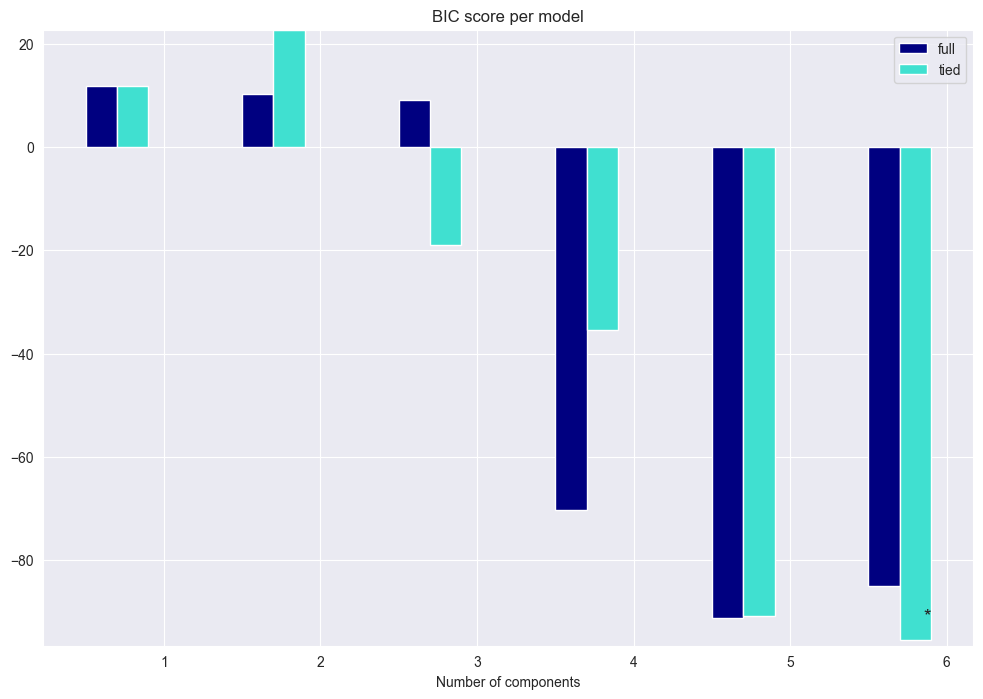

In [7]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
# cv_types = ['spherical', 'tied', 'diag', 'full']
cv_types = ['full', 'tied']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit Gaussian mixture theo phương pháp huấn luyện EM
        gmm = GaussianMixture(n_components=n_components,
        covariance_type=cv_type)
        gmm.fit(X_std)
        bic.append(gmm.bic(X_std))
        # Gán model có BIC scores thấp nhất là model tốt nhất
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise'])
clf = best_gmm
bars = []

# Vẽ biểu đồ BIC scores
plt.figure(figsize=(12, 8))
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range): (i + 1) * len(n_components_range)], width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

In [13]:
def _plot_kmean_scatter(X, labels):
    '''
    X: dữ liệu đầu vào
    labels: nhãn dự báo
    '''
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    # vẽ biểu đồ scatter
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[labels.astype(int)])
    
    # thêm nhãn cho mỗi cluster
    txts = []
    
    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])
        txts.append(txt)
    
    plt.title('t-sne visualization')

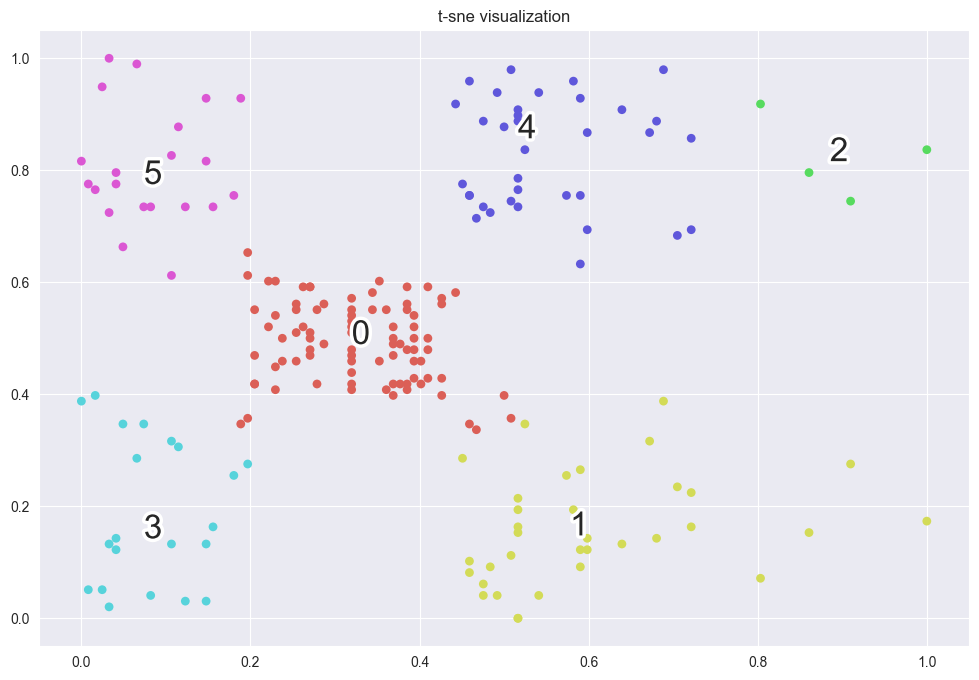

In [14]:
labels = best_gmm.predict(X_std)
_plot_kmean_scatter(X_std, labels)

## Phân cụm K-means

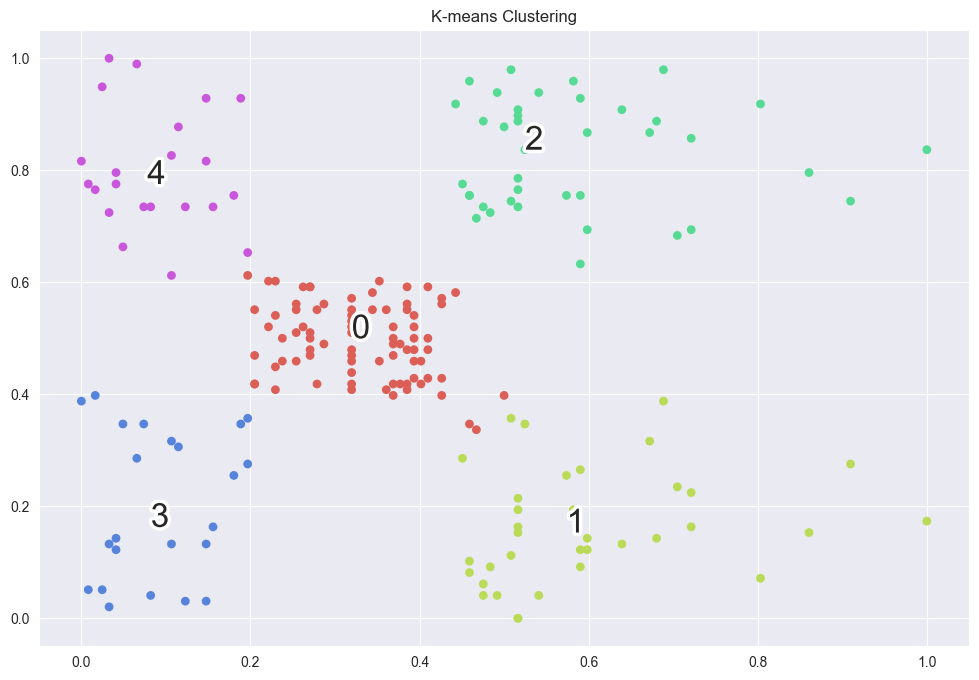

In [15]:
from sklearn.cluster import KMeans

# Phân cụm bằng K-means với số cụm là 5
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(X_std)

# Trực quan hóa kết quả phân cụm bằng K-means
def _plot_kmean_scatter(X, labels):
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sc = ax.scatter(X[:, 0], X[:, 1], lw=0, s=40, c=palette[labels.astype(int)])
    
    # Thêm nhãn cho mỗi cluster
    txts = []
    for i in range(num_classes):
        xtext, ytext = np.median(X[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])
        txts.append(txt)
    
    plt.title('K-means Clustering')
    plt.show()

_plot_kmean_scatter(X_std, kmeans_labels)


## Phân cụm DBSCAN

C:\Users\lenovo\PycharmProjects\pythonProject1\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\lenovo\PycharmProjects\pythonProject1\.venv\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values


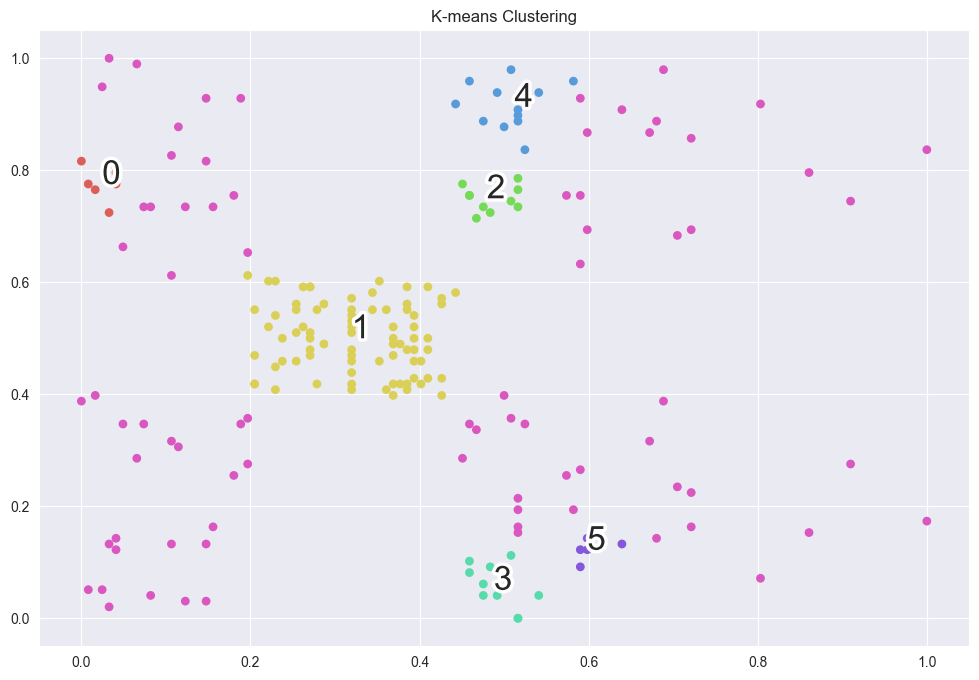

In [18]:
from sklearn.cluster import DBSCAN

# Phân cụm bằng DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_std)

# Trực quan hóa kết quả phân cụm bằng DBSCAN
_plot_kmean_scatter(X_std, dbscan_labels)


## Dùng các độ đo đánh giá Silhouette:

In [24]:
from sklearn.metrics import silhouette_score

silhouette_gm = silhouette_score(X_std, labels)
silhouette_kmeans = silhouette_score(X_std, kmeans_labels)

print(f"Silhouette Score for K-means: {silhouette_kmeans}")

print(f"Silhouette Score for Gaussian Mixture: {silhouette_gm}")

if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(X_std, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")
else:
    print("DBSCAN không tạo ra đủ cụm để tính Silhouette Score.")



Silhouette Score for K-means: 0.5594854531227246
Silhouette Score for Gaussian Mixture: 0.5481527496436199
Silhouette Score for DBSCAN: 0.14627690758859832


K-means: Nếu có một số cụm rõ ràng, K-means sẽ cho điểm cao.

DBSCAN: DBSCAN sẽ có điểm thấp nếu nó phát hiện quá nhiều điểm nhiễu (-1). Nếu dữ liệu có cấu trúc cụm không rõ ràng hoặc có mật độ không đều, DBSCAN có thể không phân cụm tốt.

Gaussian Mixture: Gaussian Mixture có thể có điểm Silhouette cao nếu số lượng cụm được chọn phù hợp với dữ liệu.

## Đánh giá độ đo DBI

In [23]:
from sklearn.metrics import davies_bouldin_score

dbi_gm = davies_bouldin_score(X_std, labels)
print(f"Davies-Bouldin Index for Gaussian Mixture: {dbi_gm}")

dbi_kmeans = davies_bouldin_score(X_std, kmeans_labels)
print(f"Davies-Bouldin Index for K-means: {dbi_kmeans}")

if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
    dbi_dbscan = davies_bouldin_score(X_std, dbscan_labels)
    print(f"Davies-Bouldin Index for DBSCAN: {dbi_dbscan}")
else:
    print("DBSCAN không tạo ra đủ cụm để tính DBI.")

Davies-Bouldin Index for Gaussian Mixture: 0.5757525747762112
Davies-Bouldin Index for K-means: 0.5678112087671997
DBSCAN không tạo ra đủ cụm để tính DBI.
